O objetivo deste notebook é analisar a correlação entre
variações do PIB (Produto interno bruto) / GDP (Gross Domestic Product)
e da taxa de mortes por 1.000 habitantes dos Estados Unidos, para testar
a hipótese de que aumentos do PIB diminuem a taxa de mortes, e vice versa.

In [60]:
import requests
import zipfile
from io import BytesIO
import pandas as pd

# os arquivos "csv" contém "metadados" nas primeiras 4 linhas
# essa função os retira
def strip_header(blob):

  lines = blob.splitlines()
  linesWithoutHeader = lines[4:]

  return b'\n'.join(linesWithoutHeader)


# baixa o arquivo zip contendo o csv, extrai somente o csv, e 
# o utiliza para iniciar um dataframe
def make_pd(url, file):
  
  response = requests.get(url)

  reader = BytesIO(response.content)

  zipReader = zipfile.ZipFile(reader)

  csv = zipReader.read(file)

  return pd.read_csv(BytesIO(strip_header(csv)))



gdp_url = 'https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=csv'
gdp_csv_file = 'API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_4344066.csv'

death_rate_url = "https://api.worldbank.org/v2/en/indicator/SP.DYN.CDRT.IN?downloadformat=csv"
death_rate_csv_file = 'API_SP.DYN.CDRT.IN_DS2_en_csv_v2_4354853.csv'

gdp = make_pd(gdp_url, gdp_csv_file)
dr = make_pd(death_rate_url, death_rate_csv_file)

In [61]:
usa_gdp = gdp[gdp["Country Name"] == "United States"]
usa_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
251,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.3,6.1,4.4,5.8,6.4,...,1.841875,2.287776,2.70637,1.667472,2.25568,2.918857,2.28887,-3.40459,5.671107,NaN


Os dados por país estão dispostos em colunas e não em linhas
Podemos utilizar "Contry Code" para filtrar o país, resultando em menos código e sendo mais fácil de trocar para outro país se necessário

In [62]:
usa_gdp = gdp[gdp["Country Code"] == "USA"]
usa_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
251,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.3,6.1,4.4,5.8,6.4,...,1.841875,2.287776,2.70637,1.667472,2.25568,2.918857,2.28887,-3.40459,5.671107,NaN


In [63]:
dr.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,6.388000,6.241000,6.118000,6.012000,5.920000,5.839000,...,8.347000,8.488000,8.627000,8.765000,8.907000,9.053000,9.205000,9.362000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,22.016422,21.639101,21.275962,20.934113,20.600616,20.284970,...,8.757960,8.422274,8.133776,7.893734,7.691457,7.521438,7.376644,7.250956,NaN,NaN
2,Afghanistan,AFG,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,32.219000,31.649000,31.093000,30.551000,30.022000,29.501000,...,7.380000,7.141000,6.929000,6.742000,6.575000,6.423000,6.285000,6.157000,NaN,NaN
3,Africa Western and Central,AFW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,26.671409,26.265887,25.870773,25.486606,25.112658,24.747503,...,11.503546,11.201067,10.912662,10.642471,10.393638,10.166492,9.960843,9.774668,NaN,NaN
4,Angola,AGO,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,27.097000,26.859000,26.627000,26.407000,26.194000,25.966000,...,9.921000,9.454000,9.052000,8.716000,8.432000,8.190000,7.981000,7.798000,NaN,NaN


In [64]:
usa_dr = dr[dr["Country Code"] == "USA"]
usa_dr

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
251,United States,USA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,9.5,9.3,9.5,9.6,9.4,9.4,...,8.215,8.237,8.44,8.493,8.638,8.678,8.7,10.3,NaN,NaN


Cria um novo dataframe com os dados anuais disposto em linhas e não em colunas. Apesar dos dados irem até 2021, vamos somente até 2019 para evitar o anos excepcionais de pandemia

In [65]:
usa_years = []

for year in range(1961, 2019):
  usa_years.append([year, usa_gdp.iloc[0][str(year)], usa_dr.iloc[0][str(year)]])

usa = pd.DataFrame(usa_years, columns=['year', 'gdp', 'death_rate'])
usa.head()

,year,gdp,death_rate
0,1961,2.3,9.3
1,1962,6.1,9.5
2,1963,4.4,9.6
3,1964,5.8,9.4
4,1965,6.4,9.4


Calcula a diferença entre a taxa de mortes de um ano em relação ao ano anterior (dr = death rate)

In [66]:
usa['dr_delta'] = usa['death_rate'] - usa['death_rate'].shift(1)
usa.head()

,year,gdp,death_rate,dr_delta
0,1961,2.3,9.3,NaN
1,1962,6.1,9.5,0.2
2,1963,4.4,9.6,0.1
3,1964,5.8,9.4,-0.2
4,1965,6.4,9.4,0.0


Calcula a variação anual relativa da taxa de mortes (yoy = Year over year)

In [67]:
usa['dr_yoy'] = (usa['dr_delta'] / usa['death_rate']) * 100
usa.head()

,year,gdp,death_rate,dr_delta,dr_yoy
0,1961,2.3,9.3,NaN,NaN
1,1962,6.1,9.5,0.2,2.105263
2,1963,4.4,9.6,0.1,1.041667
3,1964,5.8,9.4,-0.2,-2.127660
4,1965,6.4,9.4,0.0,0.000000


Retira o primeiro ano (1960) pois este não possui um ano anterior para se calcular a diferença da taxa de mortes

In [68]:
usa = usa.iloc[1: , :]
usa.head()

,year,gdp,death_rate,dr_delta,dr_yoy
1,1962,6.1,9.5,0.2,2.105263
2,1963,4.4,9.6,0.1,1.041667
3,1964,5.8,9.4,-0.2,-2.127660
4,1965,6.4,9.4,0.0,0.000000
5,1966,6.5,9.5,0.1,1.052632


In [69]:
usa.describe()

,year,gdp,death_rate,dr_delta,dr_yoy
count,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1990.000000,3.059214,8.722298,-0.010912,-0.136386
std,16.598193,2.075645,0.462790,0.154056,1.737728
min,1962.000000,-2.599888,7.900000,-0.300000,-3.409091
25%,1976.000000,2.010508,8.500000,-0.100000,-1.176471
50%,1990.000000,3.166145,8.638000,0.000000,0.000000
75%,2004.000000,4.447175,8.800000,0.100000,1.063830
max,2018.000000,7.236633,9.800000,0.400000,4.081633


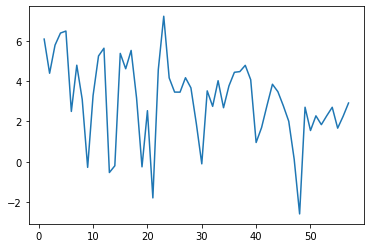

In [70]:
usa['gdp'].plot()

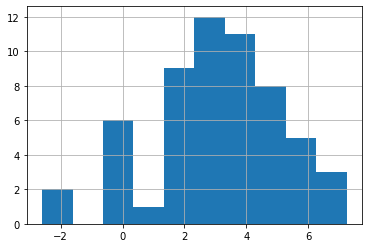

In [71]:
usa['gdp'].hist()

In [72]:
usa.var()

year          275.500000
gdp             4.308300
death_rate      0.214175
dr_delta        0.023733
dr_yoy          3.019700
dtype: float64

In [73]:
usa['gdp'].cov(usa['dr_yoy'])

0.6451433444515359

Contrariando a hipotese, as duas variáveis possuem covariance positiva

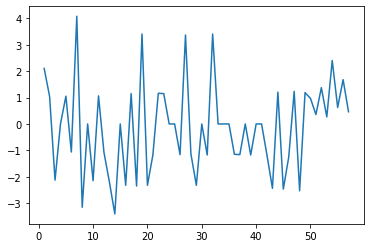

In [74]:
usa['dr_yoy'].plot()

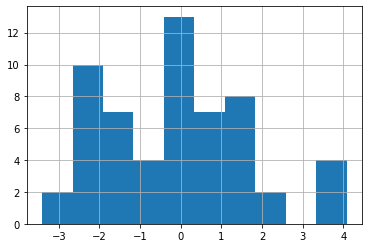

In [75]:
usa['dr_yoy'].hist()

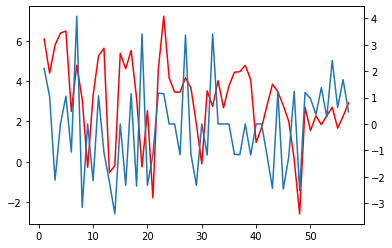

In [76]:
ax1 = usa['gdp'].plot(color=['red'])

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
usa['dr_yoy'].plot(ax=ax2)

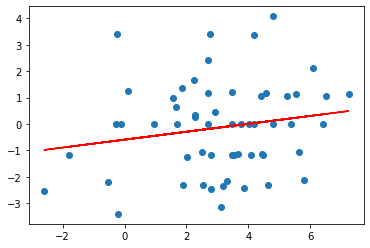

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = usa.iloc[:, 1].values.reshape(-1, 1)  # converte a serie do gdp em um numpy array
Y = usa.iloc[:, 4].values.reshape(-1, 1)  # converte a serie do dr_yoy em um numpy array

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [78]:
linear_regressor.score(X, Y)

0.03199209214870469

As duas variavéis possuem relação linear insignificante, e ainda levemente positiva, contrariando a hipotese inicial

In [79]:
usa['dr_yoy'] = usa['dr_yoy'].shift(1)
usa = usa.dropna()

Vamos adicionar um "lag" de um ano para testar se um possível efeito do PIB demora a afetar a taxa de morte

In [81]:
usa['gdp'].cov(usa['dr_yoy'])

0.45735587638164443

Covariância continua positiva

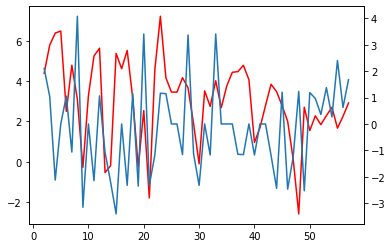

In [82]:
ax1 = usa['gdp'].plot(color=['red'])

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
usa['dr_yoy'].plot(ax=ax2)

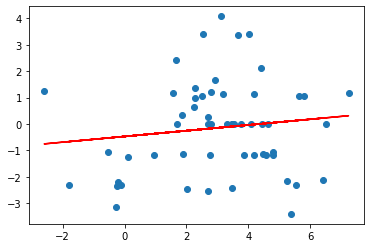

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = usa.iloc[:, 1].values.reshape(-1, 1)  # converte a serie do gdp em um numpy array
Y = usa.iloc[:, 4].values.reshape(-1, 1)  # converte a serie do dr_yoy em um numpy array

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [84]:
linear_regressor.score(X, Y)

0.016173440365711667

Correlação linear também insignificante, e levemente positiva, contrariando a hipotese

Finalizando, a hipotese foi descartada. Talvez utilizando dados de "excess deaths", ou mortes facilmente evitáveis, ou um subgrupo destas, a hipotese faça mais sentido.